In [1]:
import numpy as np
import pandas as pd
import sys
import os
import shap
import glob
from matplotlib import cm
import matplotlib.pyplot as plt
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting

/uufs/chpc.utah.edu/common/home/u1072028/software/pkg/miniconda3/envs/shap/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
outdir = "/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP"

In [5]:
s_explanations_dict = {}

for stat_dir in sorted(glob.glob(os.path.join(outdir, "S_data/*"))):
    print(stat_dir)
    stat = os.path.basename(stat_dir)
    values = []
    base_values = []
    data = []
    for file in glob.glob(os.path.join(stat_dir, "*values.npz")):
        print(file)
        fold_results = np.load(file)
        values.append(fold_results["values"])
        base_values.append(fold_results["base_values"])
        data.append(fold_results["data"])
        
    if len(values) != 10:
        raise ValueError("Expected 10 folds")
    
    s_feature_names = fold_results["feature_names"]

    values = np.concatenate(values)
    print(values.shape)
    base_values = np.concatenate(base_values)
    print(base_values.shape)
    data = np.concatenate(data)
    print(data.shape)

    explanation = shap.Explanation(values=values, 
                                base_values=base_values,
                                data=data,
                                feature_names=s_feature_names)
    
    s_explanations_dict[stat] = explanation

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/S_data/B206
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/S_data/B206/B206.S.shap.permutation.fold0.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/S_data/B206/B206.S.shap.permutation.fold1.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/S_data/B206/B206.S.shap.permutation.fold2.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/S_data/B206/B206.S.shap.permutation.fold3.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/S_data/B206/B206.S.shap.permutation.fold4.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/S_data/B206/B206.S.shap.permutation.fold5.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/S_data/B206/B206.S.shap.permutation.fold6.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/S_dat

In [6]:
explanations_dict = {}

for stat_dir in sorted(glob.glob(os.path.join(outdir, "P_data/*"))):
    print(stat_dir)
    stat = os.path.basename(stat_dir)
    values = []
    base_values = []
    data = []
    for file in glob.glob(os.path.join(stat_dir, "*values.npz")):
        print(file)
        fold_results = np.load(file)
        values.append(fold_results["values"])
        base_values.append(fold_results["base_values"])
        data.append(fold_results["data"])

    if len(values) != 10:
        raise ValueError("Expected 10 folds")
    
    # I didn't save feature_names for YUF. Also long as it is not the first dir
    # read it, should be fine...
    if stat != "YUF":
        p_feature_names = fold_results["feature_names"]

    values = np.concatenate(values)
    print(values.shape)
    base_values = np.concatenate(base_values)
    print(base_values.shape)
    data = np.concatenate(data)
    print(data.shape)

    explanation = shap.Explanation(values=values, 
                                base_values=base_values,
                                data=data,
                                feature_names=p_feature_names)
    
    explanations_dict[stat] = explanation

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/P_data/B206
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/P_data/B206/B206.P.shap.permutation.fold0.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/P_data/B206/B206.P.shap.permutation.fold1.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/P_data/B206/B206.P.shap.permutation.fold2.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/P_data/B206/B206.P.shap.permutation.fold3.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/P_data/B206/B206.P.shap.permutation.fold4.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/P_data/B206/B206.P.shap.permutation.fold5.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/P_data/B206/B206.P.shap.permutation.fold6.values.npz
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/SHAP/P_dat

In [7]:
mean_abs_vals_dict = {}
max_abs_vals_dict = {}
for stat in explanations_dict.keys():
    mean_abs_vals_dict[stat] = explanations_dict[stat].abs.mean(0).values
    max_abs_vals_dict[stat] = explanations_dict[stat].abs.max(0).values

In [8]:
s_mean_abs_vals_dict = {}
s_max_abs_vals_dict = {}
for stat in s_explanations_dict.keys():
    s_mean_abs_vals_dict[stat] = s_explanations_dict[stat].abs.mean(0).values
    s_max_abs_vals_dict[stat] = s_explanations_dict[stat].abs.max(0).values

In [9]:
mean_abs_vals_df = pd.DataFrame(mean_abs_vals_dict)
mean_abs_vals_df.index = p_feature_names
mean_abs_vals_df = mean_abs_vals_df[mean_abs_vals_df.columns.sort_values()]

In [10]:
s_mean_abs_vals_df = pd.DataFrame(s_mean_abs_vals_dict)
s_mean_abs_vals_df.index = s_feature_names
s_mean_abs_vals_df = s_mean_abs_vals_df[s_mean_abs_vals_df.columns.sort_values()]

In [11]:
max_abs_vals_df = pd.DataFrame(max_abs_vals_dict)
max_abs_vals_df.index = p_feature_names
max_abs_vals_df = max_abs_vals_df[max_abs_vals_df.columns.sort_values()]

In [12]:
s_max_abs_vals_df = pd.DataFrame(s_max_abs_vals_dict)
s_max_abs_vals_df.index = s_feature_names
s_max_abs_vals_df = s_max_abs_vals_df[s_max_abs_vals_df.columns.sort_values()]

In [13]:
plotting.set_default_fontsizes(SMALL_SIZE=8, MEDIUM_SIZE=9)

In [14]:
def plot_SHAP_heatmaps_sidebyside(p_df, s_df, 
                            colorbar=True, 
                            colorbarlabel='CV count',
                            title=None,
                            figsize=(7.5, 5.5),
                            fontsize=8,
                            savefigname=None,
                            p_title=f'$\\it P$ Models',
                            s_title=f'$\\it S$ Models',
                            lines=False,
                            colormap=cm.Blues):
    
    asp = (p_df.shape[1])/(s_df.shape[1])
    fig, axes = plt.subplots(1, 2, 
                        figsize=figsize, 
                        constrained_layout=True,
                            width_ratios=[asp, 1],
                            sharey=True)
    im1 = plotting.plot_rfecv_feature_heatmap(p_df,
                                        ax=axes[0],
                                        plot_colorbar=False,
                                        title=p_title,
                                        fontsize=fontsize,
                                        lines=lines,
                                        colormap=colormap)

    im2 = plotting.plot_rfecv_feature_heatmap(s_df,
                                        ax=axes[1],
                                        plot_colorbar=False,
                                        title=s_title,
                                        fontsize=fontsize,
                                        lines=lines,
                                        colormap=colormap)
    if colorbar:                                    
        plt.colorbar(im1, aspect=30, shrink=0.9, label=colorbarlabel, location="bottom", pad=0.02)
        plt.colorbar(im2, aspect=15, shrink=0.9, label=colorbarlabel, location="bottom", pad=0.02)

    sp_labels = ['(a)', '(b)']
    for i, ax in enumerate(axes):
        ax.text(0.01, 
                1.01, 
                sp_labels[i], 
                transform=ax.transAxes)

    fig.suptitle(title)
    if savefigname is not None:
        fig.savefig(savefigname, dpi=300)

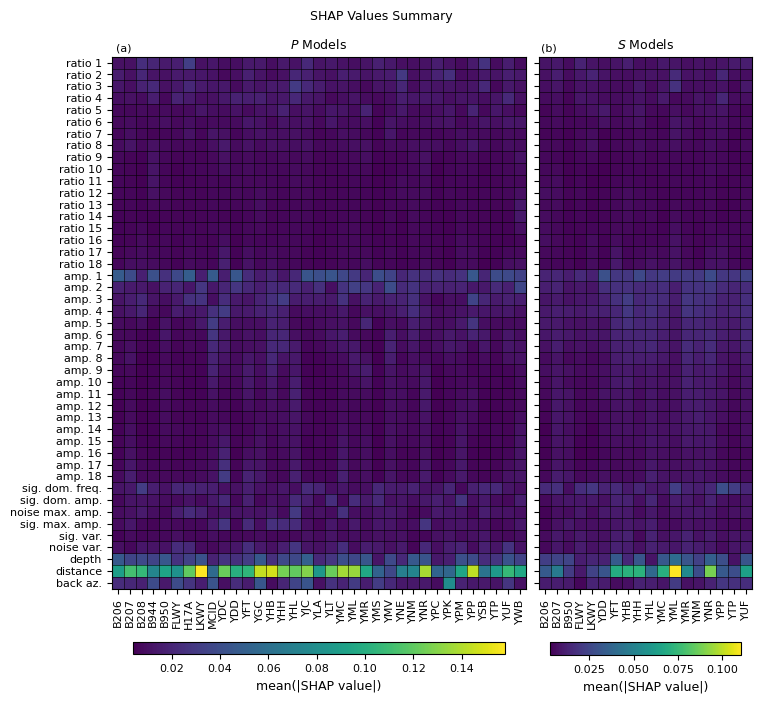

In [15]:
plot_SHAP_heatmaps_sidebyside(p_df = mean_abs_vals_df, 
                              s_df=s_mean_abs_vals_df,
                              title = 'SHAP Values Summary',
                              colorbarlabel='mean(|SHAP value|)',
                              figsize=(7.5, 6.9),
                              fontsize=None,
                              colormap=cm.viridis,
                              lines=True)

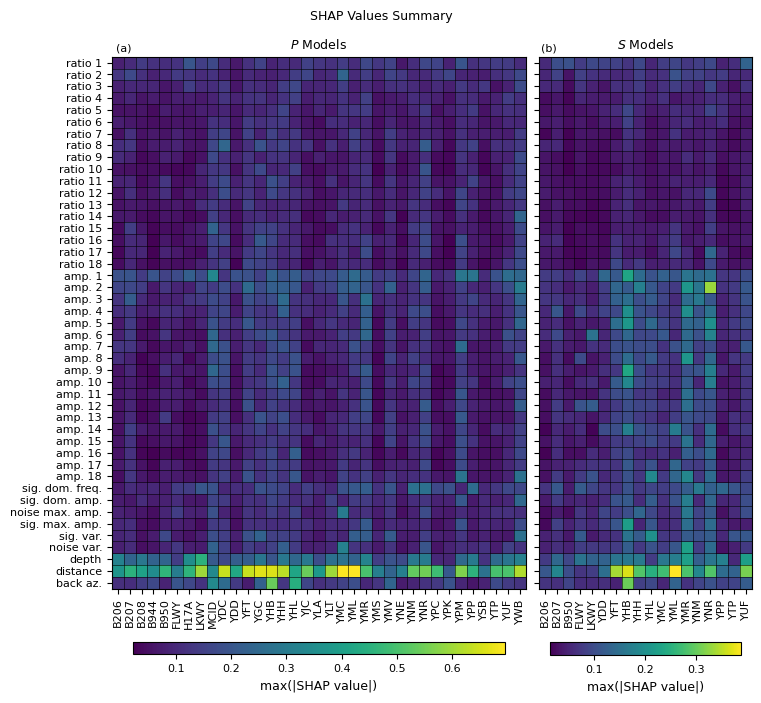

In [16]:
plot_SHAP_heatmaps_sidebyside(p_df = max_abs_vals_df, 
                              s_df=s_max_abs_vals_df,
                              title = 'SHAP Values Summary',
                              colorbarlabel='max(|SHAP value|)',
                              figsize=(7.5, 6.9),
                              fontsize=None,
                              colormap=cm.viridis,
                              lines=True)

In [17]:
p_selected_features = ["amp. 1",
                    "amp. 2",
                    "sig. var.",
                    "noise var.",
                    "depth",
                    "distance",
                    "back az."]

In [18]:
s_selected_features = ["amp. 1",
                        "amp. 2",
                        "amp. 4",
                        "noise var.",
                        "depth",
                        "distance",
                        "back az."]

In [19]:
all_selected_features = ["amp. 1",
                        "amp. 2",
                        "amp. 4",
                        "sig. var.",
                        "noise var.",
                        "depth",
                        "distance",
                        "back az."]

In [20]:
not_selected_features = p_feature_names[np.where(~np.isin(p_feature_names, all_selected_features))[0]]

In [21]:
reordered_feature_names = np.concatenate([all_selected_features, not_selected_features])

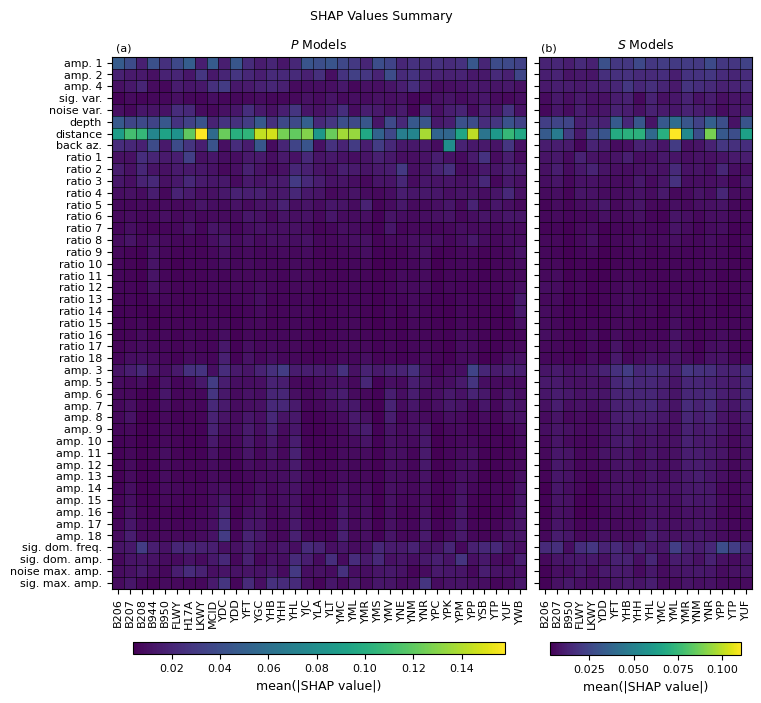

In [23]:
plot_SHAP_heatmaps_sidebyside(p_df = mean_abs_vals_df.loc[reordered_feature_names], 
                              s_df=s_mean_abs_vals_df.loc[reordered_feature_names],
                              title = 'SHAP Values Summary',
                              colorbarlabel='mean(|SHAP value|)',
                              figsize=(7.5, 6.9),
                              fontsize=None,
                              colormap=cm.viridis,
                              lines=True,
                              savefigname="../figures/SHAPSummaryMeanAbsVals.png")

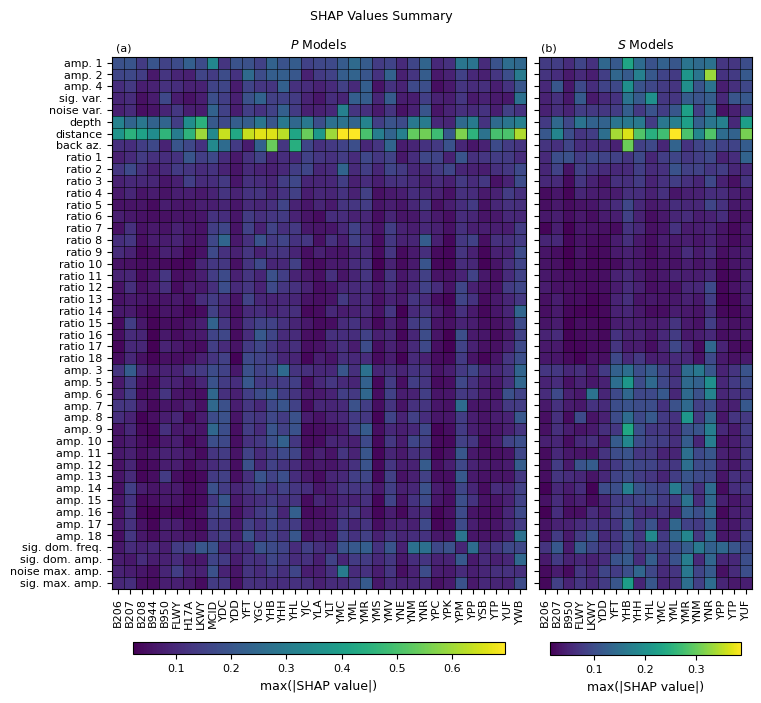

In [24]:
plot_SHAP_heatmaps_sidebyside(p_df = max_abs_vals_df.loc[reordered_feature_names], 
                              s_df=s_max_abs_vals_df.loc[reordered_feature_names],
                              title = 'SHAP Values Summary',
                              colorbarlabel='max(|SHAP value|)',
                              figsize=(7.5, 6.9),
                              fontsize=None,
                              colormap=cm.viridis,
                              lines=True)

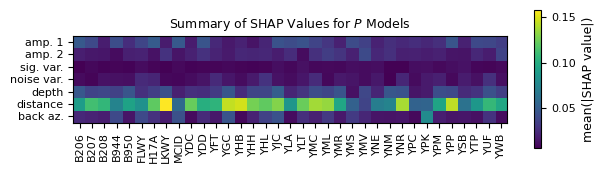

In [26]:
plotting.plot_rfecv_feature_heatmap(mean_abs_vals_df.loc[p_selected_features], 
                           figsize=(7, 3),
                           title='Summary of SHAP Values for $\\it{P}$ Models',
                           colormap=cm.viridis,
                           colorbar_label='mean(|SHAP value|)')

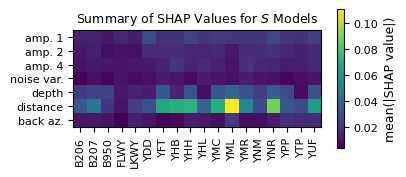

In [27]:
plotting.plot_rfecv_feature_heatmap(s_mean_abs_vals_df.loc[s_selected_features], 
                           figsize=(4, 3),
                           title='Summary of SHAP Values for $\\it{S}$ Models',
                           colormap=cm.viridis,
                           colorbar_label='mean(|SHAP value|)')

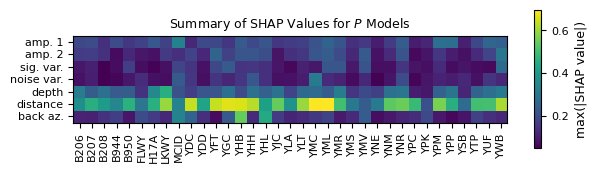

In [28]:
plotting.plot_rfecv_feature_heatmap(max_abs_vals_df.loc[p_selected_features], 
                           figsize=(7, 3),
                           title='Summary of SHAP Values for $\\it{P}$ Models',
                           colormap=cm.viridis,
                           colorbar_label='max(|SHAP value|)')

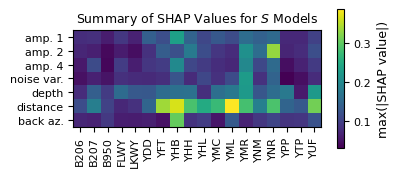

In [29]:
plotting.plot_rfecv_feature_heatmap(s_max_abs_vals_df.loc[s_selected_features], 
                           figsize=(4, 3),
                           title='Summary of SHAP Values for $\\it{S}$ Models',
                           colormap=cm.viridis,
                           colorbar_label='max(|SHAP value|)')

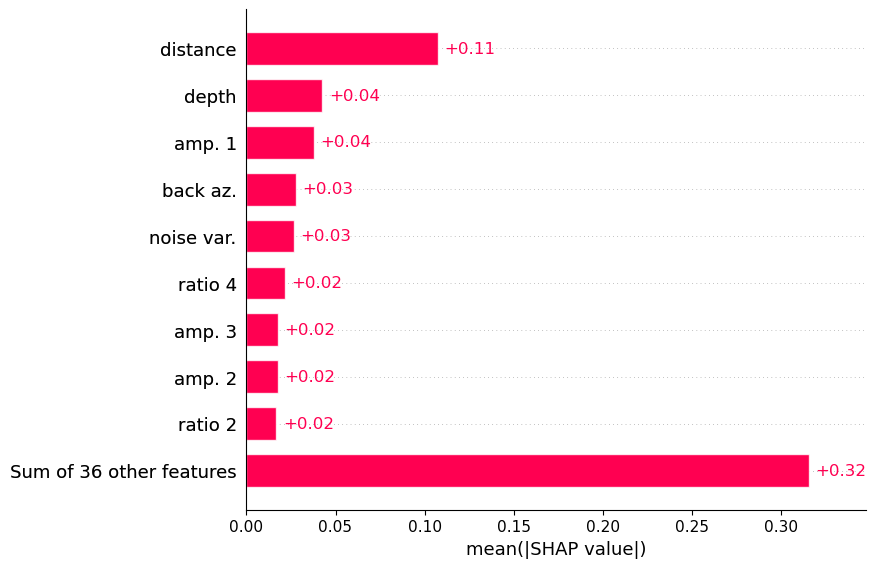

In [30]:
shap.plots.bar(explanations_dict["YUF"])

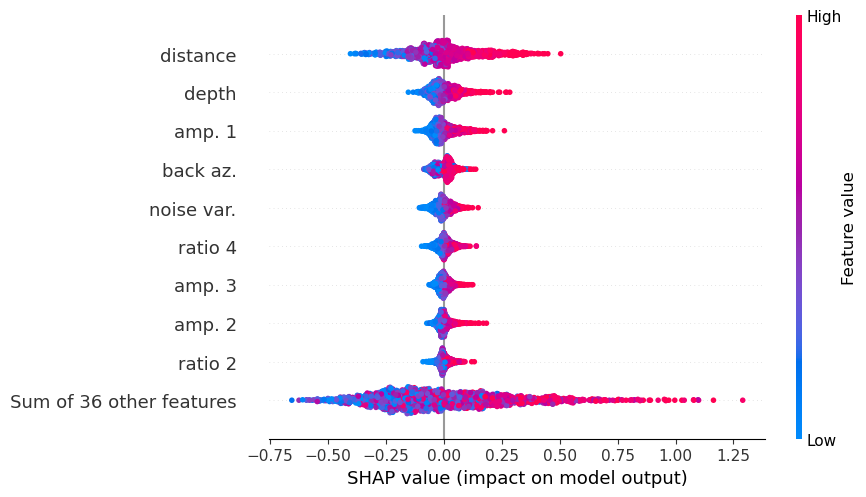

In [31]:
shap.plots.beeswarm(explanations_dict["YUF"])